<a href="https://colab.research.google.com/github/JonaJJSJ-crypto/Validaci-n-de-un-cuestionario/blob/main/Validaci%C3%B3nCuestionario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/content/drive')

# Definir el directorio de trabajo
import os

# Ruta a tu carpeta dentro de "Mi unidad"
ruta_trabajo = "/content/drive/My Drive/Metodos cuantitativos"
# Cambiar al directorio de trabajo
os.chdir(ruta_trabajo)

!pip install factor_analyzer
!pip install pingouin

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Fiabilidad y Validez en los Tests Psicométricos

## Fiabilidad
Que un test sea **validado** implica que posee un alto grado de fiabilidad, aunque lo opuesto no siempre es cierto.  
La **fiabilidad** hace referencia a la **consistencia de los resultados** de un instrumento: significa que producirá los mismos resultados bajo condiciones similares.  

**Ejemplo:** una balanza que siempre pesa un objeto de 1 kg como 500 g es **fiable**, porque siempre da el mismo resultado bajo las mismas condiciones, pero **no es válida**, ya que no refleja el valor real. Por el contrario si una balanza peso 1 kg una sola vez y las otras veces arroja otros valores no es **fiable** y por tanto su medida no puede ser válida.

En general, la fiabilidad nunca es perfecta. Por ejemplo, una persona puede obtener una nota de 18 en un examen de inglés en enero y 20 en mayo. Esto ocurre porque los resultados dependen de dos tipos de factores:  

- **Factores consistentes**: características estables del individuo o atributo que se busca medir.  
- **Factores inconsistentes**: aspectos circunstanciales que afectan la medición pero no forman parte de lo que se quiere evaluar (fatiga, salud, motivación, atención, distracciones).  

La puntuación observada en un test \(X\) puede expresarse como:  
$$
X = T + e
$$  
donde:  
- \(T\) = valor verdadero,  
- \(e\) = error de medición.  

---

## Relación entre Fiabilidad y Validez
- **Fiabilidad**: mide **consistencia** (que el instrumento dé los mismos resultados repetidamente).  
- **Validez**: mide **exactitud** (que realmente mida lo que se quiere medir).  
Un instrumento puede ser fiable pero no válido (como el caso de la balanza); sin embargo, **no puede ser válido sin ser al menos razonablemente fiable**.  

<img src="https://sciencenotes.org/wp-content/uploads/2021/08/Accuracy-and-Precision.png" alt="Vector 3D" style="width:0.5;">

Fuente: https://sciencenotes.org/what-is-the-difference-between-accuracy-and-precision/

---

## Fórmula de la Fiabilidad
En estadística (en el colectivo), se asume que los errores son aleatorios, por lo que:  
$$
\sigma_X^2 = \sigma_T^2 + \sigma_e^2
$$  

La fiabilidad se define como:  
$$
r_{xx} = \frac{\sigma_T^2}{\sigma_X^2} = \frac{\sigma_T^2}{\sigma_T^2 + \sigma_e^2}
$$  

**Interpretación:**  
- Valores cercanos a **1** → gran parte de la variabilidad se debe al valor verdadero.  
- Valores cercanos a **0** → predominan los errores y factores aleatorios.  

---

## Error Estándar de Medición (EEM)
El **EEM** estima la dispersión de los puntajes individuales alrededor del puntaje verdadero.  

$$
EEM = SD \times \sqrt{1 - r_{xx}}
$$  

donde:  
- **SD** = desviación estándar del test,  
- **rxx** = coeficiente de fiabilidad.  

**Interpretación:** cuanto menor sea el EEM, mayor será la precisión del test.  

### Intervalo de Confianza con el EEM
El EEM permite construir **intervalos de confianza** alrededor de la puntuación observada de un individuo, lo que refleja el rango en el que probablemente se encuentra su puntaje verdadero.  

Fórmula para un intervalo al 95%:  
$$
IC_{95\%} = X \pm (1.96 \times EEM)
$$  

donde 1.96 es el valor crítico de la distribución normal estándar para un 95% de confianza.

<img src="https://homework.study.com/cimages/multimages/16/confidenceinterval958972901994324657897.png" alt="Vector 3D" style="width:5%;">

Fuente: https://homework.study.com/explanation/in-constructing-a-95-confidence-level-estimate-of-the-mean-when-the-population-standard-deviation-is-known-what-will-be-your-z-score-used-in-the-formula.html

**Ejemplo:**  
- Puntaje observado: \( X = 80 \)  
- \( SD = 10 \), \( r_{xx} = 0.84 \)  
- Cálculo del EEM:  
$$
EEM = 10 \times \sqrt{1 - 0.84} = 10 \times 0.4 = 4
$$  
- Intervalo de confianza:  
$$
IC_{95\%} = 80 \pm (1.96 \times 4) = 80 \pm 7.84
$$  
- Resultado:  
$$
IC_{95\%} = [72.16 , 87.84]
$$  

Interpretación: con un 95% de confianza, el puntaje verdadero de la persona se encuentra entre **72 y 88**.  

---

In [14]:
import numpy as np

# -----------------------------
# Parámetros del ejemplo
# -----------------------------
X = 80      # Puntaje observado
SD = 10      # Desviación estándar del test
rxx = 0.84   # Coeficiente de fiabilidad

# -----------------------------
# Cálculo del Error Estándar de Medición (EEM)
# -----------------------------
EEM = SD * np.sqrt(1 - rxx)

# -----------------------------
# Intervalo de Confianza al 95%
# -----------------------------
z = 1.96  # valor crítico para 95%
IC95_inf = X - z * EEM
IC95_sup = X + z * EEM

# -----------------------------
# Resultados
# -----------------------------
print("Puntaje observado:", X)
print("Desviación estándar (SD):", SD)
print("Coeficiente de fiabilidad (rxx):", rxx)
print("Error Estándar de Medición (EEM):", round(EEM, 2))
print(f"IC 95%: [{round(IC95_inf, 2)}, {round(IC95_sup, 2)}]")

Puntaje observado: 80
Desviación estándar (SD): 10
Coeficiente de fiabilidad (rxx): 0.84
Error Estándar de Medición (EEM): 4.0
IC 95%: [72.16, 87.84]


## Índice de Homogeneidad
Evalúa la correlación de cada ítem con el puntaje total del test (menos ese ítem).  

$$
r_{it} = \text{correlación (ítem i, puntaje total)}
$$  

- Valores altos → el ítem mide lo mismo que la escala.
- Valores bajos → el ítem no aporta al constructo y debe revisarse.

¿Cuál item putuará **alto** en un test de Inteligencia?:

 - Color de Ojos. ✅ ❌
 - Adaptación a los cambios. ✅ ❌
 - Recursos económicos. ✅ ❌
 - Número de títulos de 4 nivel. ✅ ❌
 - Sabe cuándo hablar y cuándo guardar silencio. ✅ ❌
 - Empático con las personas. ✅ ❌
 - Lidera las conversaciones del grupo. ✅ ❌
 - Abierto a aprender constantemente. ✅ ❌
 - Escuchar música clásica. ✅ ❌

### Índice de Homogeneidad Corregido
Se calcula correlando el ítem con el **puntaje total sin incluir dicho ítem**:  

$$
r_{itc} = \text{correlación (ítem i, puntaje total sin el ítem i)}
$$  

**Importancia:**  
- Evita la **inflación espuria** de la correlación.  
- Estima de forma más real la contribución del ítem al constructo.  
- Permite identificar ítems **problemáticos o redundantes**.  

**Criterios comunes:**  
- $ r_{itc} < 0.20 $ → el ítem probablemente no aporta al constructo.  
- $ r_{itc} > 0.40 $ → el ítem es un buen indicador.  

Este índice es clave en la **depuración de cuestionarios** para mejorar la **consistencia interna** y, en consecuencia, la fiabilidad del test.  

---

In [15]:
import pandas as pd

# -------------------------------
# 1. Cargar los datos
# -------------------------------
Empleo = pd.read_csv("/content/drive/MyDrive/Metodos cuantitativos/SolicitantesEmpleo.csv", index_col=0)

# Visualizar primeras filas
print("Vista previa del dataset:")
display(Empleo.head())

# -------------------------------
# 2. Calcular Índice de Homogeneidad Corregido (ritc)
# -------------------------------
ritc = {}

# Iterar sobre cada columna (ítem)
for col in Empleo.columns:
    # Puntaje total sin el ítem actual
    total_sin_item = Empleo.drop(columns=[col]).sum(axis=1)

    # Calcular correlación ítem vs total sin el ítem
    corr = Empleo[col].corr(total_sin_item)

    ritc[col] = corr

# -------------------------------
# 3. Resultados en tabla
# -------------------------------
ritc_df = pd.DataFrame.from_dict(ritc, orient='index', columns=["ritc"]).sort_values(by="ritc", ascending=False)

print("\nÍndice de Homogeneidad Corregido por ítem:")
display(ritc_df)

# -------------------------------
# 4. Interpretación básica
# -------------------------------
print("\nInterpretación sugerida:")
print("Ítems con ritc < 0.20 → Revisar o eliminar.")
print("Ítems con ritc > 0.40 → Buen indicador del constructo.")


Vista previa del dataset:


,Apariencia,Comunicación,Apto P Cía,Experiencia,Apto P Trabajo,Carta,Simpatía,Organización,Potencial,C. V.,Autoconfianza
Estudios,,,,,,,,,,,
6.0,8.0,7.0,5.0,6.0,5.0,7.0,7.0,7.0,6.0,7.0,7.0
9.0,8.0,8.0,8.0,10.0,9.0,8.0,9.0,8.0,9.0,9.0,9.0
6.0,7.0,7.0,6.0,6.0,7.0,7.0,8.0,8.0,6.0,6.0,8.0
7.0,8.0,6.0,5.0,8.0,5.0,9.0,8.0,7.0,8.0,7.0,7.0
4.0,7.0,8.0,6.0,6.0,6.0,6.0,7.0,8.0,5.0,4.0,6.0



Índice de Homogeneidad Corregido por ítem:


,ritc
Apto P Trabajo,0.764107
Apto P Cía,0.756733
Potencial,0.718084
Simpatía,0.672299
C. V.,0.662602
Comunicación,0.661825
Organización,0.645013
Apariencia,0.640290
Autoconfianza,0.636609
Carta,0.593701



Interpretación sugerida:
Ítems con ritc < 0.20 → Revisar o eliminar.
Ítems con ritc > 0.40 → Buen indicador del constructo.


## Métodos para medir la Fiabilidad
1. **Test paralelo**: aplicar dos versiones equivalentes del mismo test.  
2. **Test-retest**: aplicar el mismo test en distintos momentos.  
3. **Partición en mitades**: dividir el test y correlacionar resultados.  
4. **Consistencia interna (Alfa de Cronbach)**: analiza la covarianza de todos los ítems.  

---

## Alfa de Cronbach
$$
\alpha = \frac{k \bar{c}}{\bar{v} + (k-1)\bar{c}}
$$  

donde:  
- $k$ = número de ítems,  
- $\bar{c}$ = covarianza media entre ítems,  
- $\bar{v}$ = varianza media de los ítems.  
## Forma alternativa
$$
\alpha = \frac{k}{k-1} \left( 1 - \frac{\sum_{i=1}^{k} \sigma_i^2}{\sigma_X^2} \right)
$$
donde:  
- $k$ = número de ítems,  
- $\sigma_i^2$ = varianza de cada ítem,
- $\sigma_X^2$ = varianza total del test.

**Supuestos:**  
- **Unidimensionalidad**: los ítems miden un único constructo.  
- **Tau-equivalencia**: los ítems tienen la misma precisión.  
- **Escalas tipo Likert o dicotómicas**: apropiado para este tipo de ítems.  

---

In [16]:
# --- Alpha de Cronbach (cálculo explícito) ---
import pandas as pd
import numpy as np

# Cargar datos (misma ruta que arriba)
df = pd.read_csv("/content/drive/MyDrive/Metodos cuantitativos/SolicitantesEmpleo.csv", index_col=0)

# Mantener solo columnas numéricas y manejar faltantes
df = df.apply(pd.to_numeric, errors='coerce').dropna(axis=0, how='any')

# Convertir a matriz
X = df.to_numpy()
k = X.shape[1]  # número de ítems

# Varianza de cada ítem (muestral, ddof=1)
var_items = X.var(axis=0, ddof=1)

# Puntaje total por sujeto y su varianza (muestral, ddof=1)
score_total = X.sum(axis=1)
var_total = score_total.var(ddof=1)

alpha_exp = (k / (k - 1.0)) * (1 - (var_items.sum() / var_total))

print(f"Alpha de Cronbach (explícito) = {alpha_exp:.4f}")

Alpha de Cronbach (explícito) = 0.9090


In [32]:
# --- Alpha de Cronbach con pingouin ---
import pandas as pd
from pingouin import cronbach_alpha

# Cargar datos (ajusta la ruta si tu carpeta tiene otro nombre o tildes)
df = pd.read_csv("/content/drive/MyDrive/Metodos cuantitativos/SolicitantesEmpleo.csv", index_col=0)

# Mantener solo columnas numéricas (coerción de no numéricos a NaN)
df = df.apply(pd.to_numeric, errors='coerce')

# Opciones de manejo de faltantes: dropna por fila
df = df.dropna(axis=0, how='any')

# Calcular alpha y su intervalo de confianza
alpha, ci = cronbach_alpha(data=df)

print(f"Alpha de Cronbach (pingouin) = {alpha:.4f}")
print(f"IC 95% (aprox.): [{ci[0]:.4f}, {ci[1]:.4f}]")


Alpha de Cronbach (pingouin) = 0.9090
IC 95% (aprox.): [0.8670, 0.9420]


## Cómo Establecer la Validez de un Cuestionario
Para determinar si un cuestionario es **válido**, es decir, si mide efectivamente lo que pretende medir, se utilizan distintos tipos de validez:  

1. **Validez de contenido**: se evalúa si los ítems representan de manera adecuada y suficiente el constructo teórico.  
   - Se apoya en revisión de expertos y en la literatura existente.  

2. **Validez de criterio**: se examina la relación entre el cuestionario y un criterio externo reconocido como referencia.  
   - Puede ser **concurrente** (comparación inmediata con un criterio) o **predictiva** (capacidad del test para anticipar resultados futuros).  

3. **Validez de constructo**: se analiza si el cuestionario realmente mide el constructo teórico que pretende.  
   - Se apoya en análisis factorial exploratorio y confirmatorio.  
   - Incluye la **validez convergente** (el cuestionario se correlaciona con otros instrumentos que miden lo mismo) y la **validez discriminante** (el cuestionario no se correlaciona con instrumentos que miden cosas distintas).

---

## Análisis Factorial
El **análisis factorial** es una técnica que permite identificar las **dimensiones latentes** de un cuestionario:  

- **Exploratorio (AFE)**: descubre la estructura subyacente.  
- **Confirmatorio (AFC)**: valida una estructura teórica propuesta.  

### Comunalidad
La **comunalidad** ($h_i^2$) representa la proporción de la varianza de un ítem que es explicada por los factores comunes.  

$$
h_i^2 = \sum_{j=1}^m ( \lambda_{ij} )^2
$$  

**Criterios:**  
- $h_i^2 > 0.50$ → ítem bien representado.  
- $0.30 \leq h_i^2 < 0.50$ → marginal, revisar según contexto.  
- $h_i^2 < 0.30$ → ítem poco representado, considerar eliminarlo.  

### Varianza Explicada
La **varianza explicada** indica el porcentaje de la variabilidad total de los ítems explicado por los factores retenidos.  

- Se calcula sumando los **autovalores (eigenvalues)** de los factores y dividiéndolos entre la varianza total.  
- En ciencias sociales, un modelo que explique **50–60% de la varianza total** suele considerarse adecuado.  

**Ejemplo:** si tres factores explican 25%, 20% y 15% → varianza total explicada = 60%.   

---



<img src="https://www.intmath.com/vectors/img/235-unit-vector.gif" alt="Vector 3D" style="width:10%;">

Fuente: https://www.intmath.com/vectors/7-vectors-in-3d-space.php

## Numero de Factores con Scree Plot

El **scree plot** muestra los autovalores (eigenvalues) ordenados por factor.  
Su análisis ayuda a decidir cuántos factores retener en el **Análisis Factorial Exploratorio (AFE)**.

### Pautas de interpretación

- **Regla de Kaiser**: conservar los factores con eigenvalue > 1.  
- **Codo de Cattell**: identificar el punto donde la pendiente del gráfico se
aplana (el "codo").  
- **Consistencia teórica**: verificar que el número de factores retenidos tenga sentido con el marco conceptual del estudio.  
- **Varianza explicada acumulada**: en ciencias sociales suele buscarse entre un 50%–70% de varianza total explicada.

Eigenvalues: [5.90559743 1.41441786 1.05990513 0.99634338 0.51518176 0.35996389
 0.25234783 0.18303441 0.14940666 0.08678293 0.0770187 ]


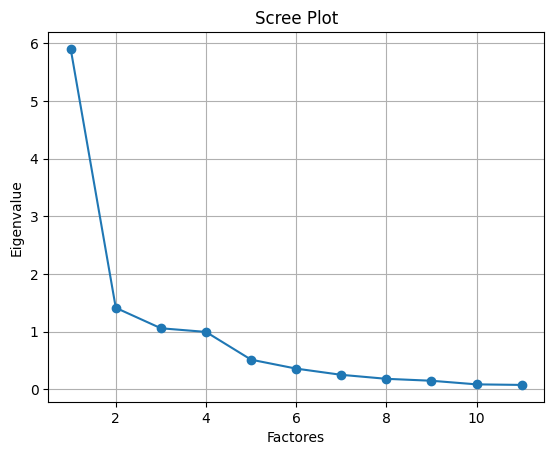

In [18]:
!pip install factor_analyzer
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

# Ajustar el modelo de análisis factorial
fa = FactorAnalyzer(rotation='varimax')
fa.fit(Empleo)

# Obtener eigenvalues
ev, v = fa.get_eigenvalues()
print("Eigenvalues:", ev)

# Graficar Scree Plot
plt.plot(range(1, Empleo.shape[1] + 1), ev, marker='o')
plt.xlabel('Factores')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

## Análisis Factorial con y sin Rotación

Una forma de comparar la estructura de los factores es observar la **matriz de cargas factoriales** con y sin rotación.  
En este ejemplo se comparan dos variantes:

- **FA sin rotación**: muestra la solución inicial.  
- **FA con rotación varimax**: redistribuye las cargas para facilitar la interpretación y lograr mayor simplicidad factorial.  

El resultado se visualiza en un **mapa de calor** donde cada celda representa la carga de un ítem sobre un factor.

![Descripción del GIF](https://i.makeagif.com/media/4-26-2021/cxmIOB.gif)

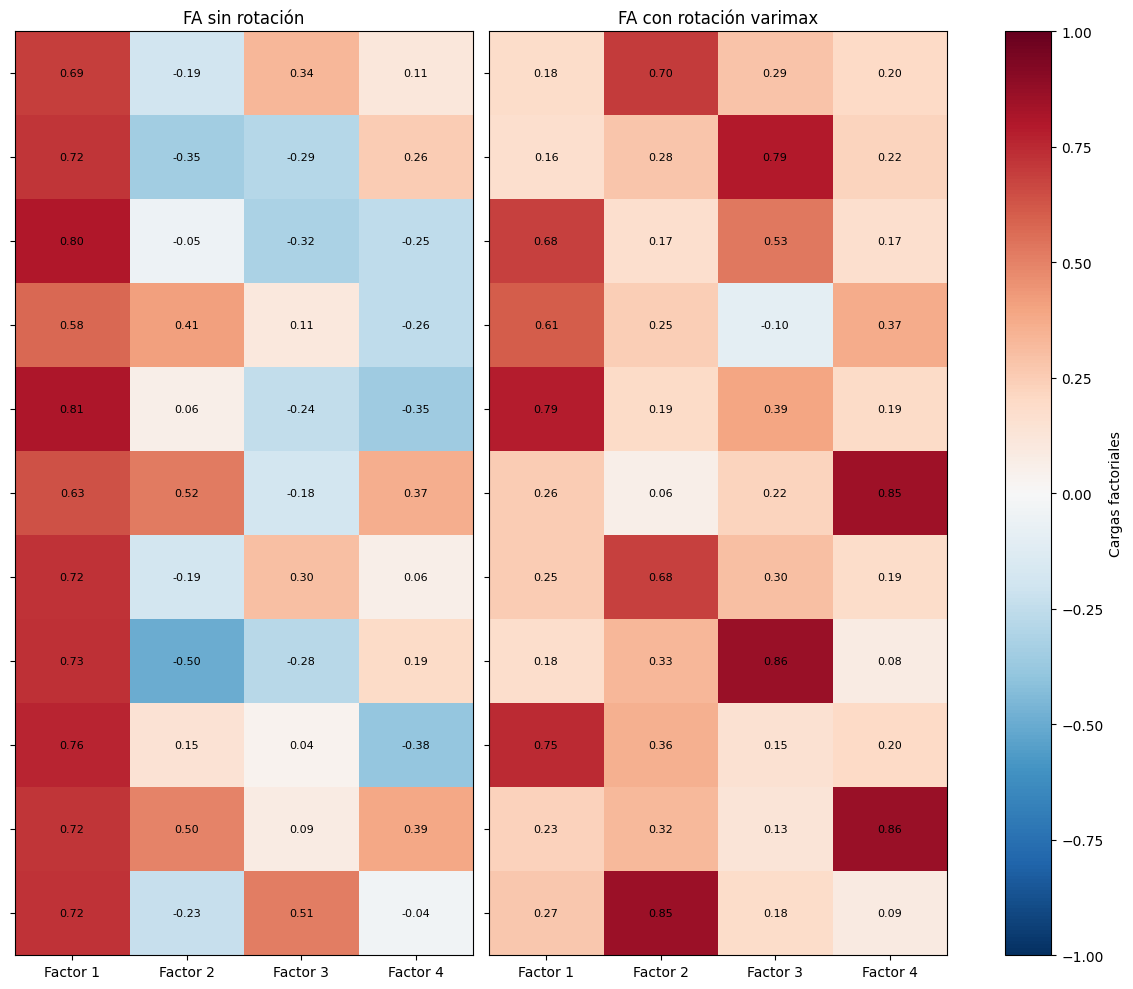

In [31]:
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import numpy as np

# 1) Estandarizar los datos
X = StandardScaler().fit_transform(Empleo)

# 2) Número de factores a extraer
factors = 4

# 3) Variantes del análisis (nota: FactorAnalyzer usa n_factors y .loadings_)
fas = [
    ("FA sin rotación", FactorAnalyzer(n_factors=factors, rotation=None)),
    ("FA con rotación varimax", FactorAnalyzer(n_factors=factors, rotation="varimax")),
]

# 4) Preparar la figura
fig, axes = plt.subplots(ncols=len(fas), figsize=(12, 10), sharex=True, sharey=True)

for ax, (title, fa) in zip(axes, fas):
    fa = fa.fit(X)  # Ajuste del modelo
    factor_matrix = fa.loadings_  # (items x factors)

    # Mapa de calor
    im = ax.imshow(factor_matrix, cmap="RdBu_r", vmin=-1, vmax=1, aspect="auto")

    # Anotar cada celda con el valor redondeado
    for (i, j), z in np.ndenumerate(factor_matrix):
        ax.text(j, i, f"{z:.2f}", ha="center", va="center", fontsize=8)

    # Ejes y etiquetas
    ax.set_title(title)
    ax.set_yticks(np.arange(len(Empleo.columns)))
    if ax.get_subplotspec().is_first_col():
        ax.set_yticklabels(Empleo.columns, fontsize=8)
    else:
        ax.set_yticklabels([])

    ax.set_xticks(range(factors))
    ax.set_xticklabels([f"Factor {k+1}" for k in range(factors)], rotation=0)

# Ajustar layout y colorbar
plt.tight_layout()
cbar = fig.colorbar(im, ax=axes.ravel().tolist(), location="right", label="Cargas factoriales")
plt.show()


In [28]:
Empleo.columns

Index(['Apariencia', 'Comunicación', 'Apto P Cía', 'Experiencia',
       'Apto P Trabajo', 'Carta', 'Simpatía', 'Organización', 'Potencial',
       'C. V.', 'Autoconfianza'],
      dtype='object')

## Comunalidades y Varianza Explicada en el AFE

Cuando aplicamos un Análisis Factorial, dos resultados son claves para entender qué tan bien funciona el modelo:

- **Comunalidades**: nos dicen cuánto de la variabilidad de cada pregunta (ítem) está siendo explicado por los factores.  
  - Si son **altas**, significa que la pregunta está bien representada.  
  - Si son **muy bajas**, esa pregunta no encaja bien y conviene revisarla.  

- **Varianza explicada por los factores**: muestra cuánta información total del cuestionario logran captar los factores.  
  - Se revisa tanto la varianza que aporta cada factor como la varianza acumulada.  
  - En estudios sociales, lo recomendable es que los factores juntos expliquen al menos un **50%–70%** de la información.  

Buscamos que la mayoría de las preguntas tengan comunalidades aceptables (idealmente arriba de 0.30) y que la suma de los factores logre explicar una buena parte de los datos (mínimo 50%). Eso nos da confianza en que el modelo refleja bien la realidad que queremos medir.


In [20]:
import numpy as np
import pandas as pd
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame

# -------------------------------
# 1) Cargar y preparar datos
# -------------------------------
df = Empleo.copy()

# Asegurar numéricos y manejar faltantes (ajusta a tu política de NA)
df = df.apply(pd.to_numeric, errors='coerce').dropna(axis=0, how='any')

# Estandarizar (recomendado para AFE)
X = StandardScaler().fit_transform(df)

# -------------------------------
# 2) Estimar n_factors por Kaiser
# -------------------------------
# Para obtener eigenvalues necesitamos un ajuste "temporal" sin fijar n_factors
fa_tmp = FactorAnalyzer(rotation=None, method='ml')
fa_tmp.fit(X)

ev, _ = fa_tmp.get_eigenvalues()
#n_factors = int(np.sum(ev > 1))
n_factors = 4
n_factors = max(n_factors, 1)  # al menos 1 factor

print(f"Número de factores (Kaiser): {n_factors}")

# -------------------------------
# 3) Ajustar modelo ML con rotación varimax
# -------------------------------
fa_ml = FactorAnalyzer(n_factors=n_factors, rotation='varimax', method='ml')
fa_ml.fit(X)

# -------------------------------
# 4) Comunalidades
# -------------------------------
communalities = fa_ml.get_communalities()
print("\nComunalidades:")
display(DataFrame(communalities, index=df.columns, columns=['Comunalities']))

# -------------------------------
# 5) Varianza explicada por factor
# -------------------------------
# get_factor_variance devuelve: (SS Loadings, Proportion Var, Cumulative Var)
explained_variance = fa_ml.get_factor_variance()
Variance = DataFrame(
    explained_variance,
    index=['SS Loadings', 'Proportion Var', 'Cumulative Var'],
    columns=[f'Factor {i+1}' for i in range(fa_ml.n_factors)]
)
Variance["Total"] = Variance.sum(axis=1)

print("\nVarianza Explicada:")
display(Variance)

Número de factores (Kaiser): 4

Comunalidades:


,Comunalities
Apariencia,0.637439
Comunicación,0.780391
Apto P Cía,0.836074
Experiencia,0.423848
Apto P Trabajo,0.959151
Carta,0.772047
Simpatía,0.667244
Organización,0.995001
Potencial,0.583715
C. V.,0.995004



Varianza Explicada:


,Factor 1,Factor 2,Factor 3,Factor 4,Total
SS Loadings,2.379955,2.247881,1.955194,1.930361,8.513390
Proportion Var,0.216360,0.204353,0.177745,0.175487,0.773945
Cumulative Var,0.216360,0.420712,0.598457,0.773945,2.009474


#Ejemplo autos
Estos datos registran dimensiones asociadas con las especificaciones de Autos y el confort percibido por los usuarios.


    Cilindrada  Potencia  Velocidad  Comodidad  Espacioso  Silencioso
0         1396        90        174       9.95       9.05       10.00
1         1721        92        170       7.96       9.02       10.00
2         1580        83        154       6.95       6.95        7.99
3         1769        90        180       1.15       2.06        1.05
4         2068        88        180       3.05       3.02        3.02
5         1769        90        182       2.99       2.99        1.06
6         2986       188        226       1.98       2.00        0.00
7         2675       177        222       1.91       1.85        1.01
8         2548       182        226       1.93       3.10        1.06
9         1998       122        190       2.05       2.08        2.06
10        1905       125        194       2.15       3.01        1.99
11        1993       115        185       6.13       3.99        3.87
12        1294       103        189       1.09       1.00        0.16
13        1461      

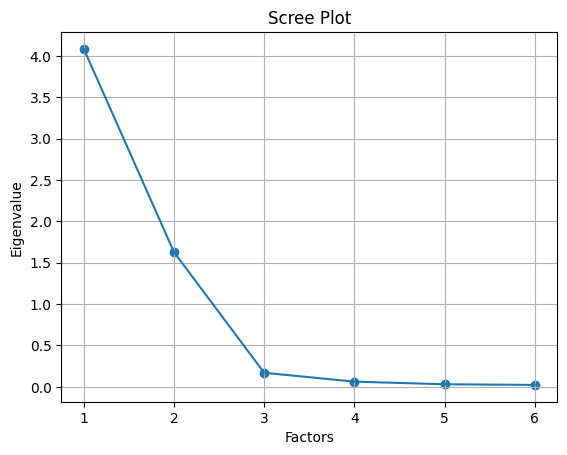

Factor 1:  4.0848 0.6808  0.6808
Factor 2:  1.6274 0.2712  0.9520
Factor 3:  0.1701 0.0284  0.9804
Factor 4:  0.0630 0.0105  0.9909
Factor 5:  0.0314 0.0052  0.9961
Factor 6:  0.0233 0.0039  1.0000


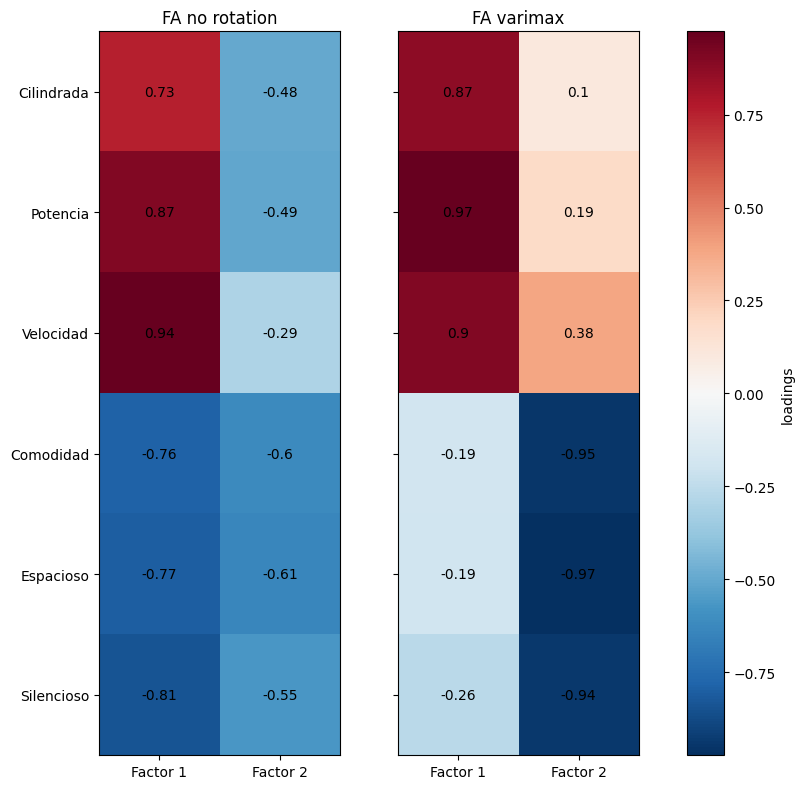

In [25]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import FactorAnalysis


df_carros = pd.read_csv("Carros.csv")

df_carros = df_carros.drop("Autos", axis=1)
print(df_carros)

fa_carros = FactorAnalyzer(rotation=None)
fa_carros.fit(df_carros, 25)
# Check Eigenvalues
ev_carros, v_carros = fa_carros.get_eigenvalues()
ev_carros

# Create scree plot using matplotlib
plt.scatter(range(1,df_carros.shape[1]+1),ev_carros)
plt.plot(range(1,df_carros.shape[1]+1),ev_carros)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

#variance explained
variances = ev_carros / np.sum(ev_carros)
cummulative_var = 0
for i, var in enumerate(variances, 1):
    cummulative_var = cummulative_var + var
    print(f"Factor {i}: {ev_carros[i-1]: .4f} {var:.4f} {cummulative_var: .4f}")

X = StandardScaler().fit_transform(df_carros)  # Standardize the data
factors = 2
#  a list of 2 tuples containing titles for and instances of or class
fas = [
    ("FA no rotation", FactorAnalysis(n_components = factors)),
    ("FA varimax", FactorAnalysis(n_components = factors, rotation="varimax")),
]

#  Let's prepare some plots on one canvas (subplots)
fig, axes = plt.subplots(ncols=len(fas), figsize=(10, 8))

'''
And loop over the variants of our analysis `fas`, zipped with the
plot axes `axes`
'''
for ax, (title, fa) in zip(axes, fas):
    #  Fit the model to the standardized food data
    fa = fa.fit(X)
    #  and transpose the component (loading) matrix
    factor_matrix = fa.components_.T
    #  Plot the data as a heat map
    colorlim = max(np.abs(np.min(factor_matrix)),np.max(factor_matrix))
    im = ax.imshow(factor_matrix, cmap="RdBu_r", vmax=colorlim, vmin=-colorlim)
    #  and add the corresponding value to the center of each cell
    for (i,j), z in np.ndenumerate(factor_matrix):
        ax.text(j, i, str(z.round(2)), ha="center", va="center")
    #  Tell matplotlib about the metadata of the plot
    ax.set_yticks(np.arange(len(df_carros.columns)))
    if ax.get_subplotspec().is_first_col():
        ax.set_yticklabels(df_carros.columns)
    else:
        ax.set_yticklabels([])
    ax.set_title(title)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["Factor 1", "Factor 2"])
    #  and squeeze the axes tight, to save space
    plt.tight_layout()

#  and add a colorbar
cb = fig.colorbar(im, ax=axes, location='right', label="loadings")
#  show us the plot
plt.show()



## Gráficos de cargas factoriales con distintas rotaciones

Los **gráficos de dispersión de cargas factoriales** permiten visualizar cómo se distribuyen los ítems en un espacio bidimensional definido por dos factores.  
En el ejemplo se comparan tres variantes del AFE:

- **FA sin rotación**: muestra la solución inicial, a menudo con cargas mezcladas.  
- **FA con rotación Varimax (ortogonal)**: busca maximizar la varianza de las cargas por factor, logrando que cada ítem cargue fuertemente en un solo factor (simplifica la interpretación).  
- **FA con rotación Quartimax (ortogonal)**: tiende a concentrar la varianza en pocos factores, a veces menos útil para separar ítems, pero clarifica la estructura global.  

### Interpretación
- Cada punto representa un ítem del test.  
- Su posición indica la fuerza de su carga en **Factor 1 (eje x)** y **Factor 2 (eje y)**.  
- Los gráficos permiten identificar si los ítems se agrupan en torno a un factor (lo que sugiere buena estructura) o si presentan cargas cruzadas en varios factores.  
- La rotación *Varimax* suele ser la más recomendada en ciencias sociales, ya que facilita la **interpretabilidad** de los factores.

In [ ]:
# Comparación de rotaciones en análisis factorial
methods = [
    ("FA sin rotación", FactorAnalysis(2,)),
    ("FA Varimax", FactorAnalysis(2, rotation="varimax")),
    ("FA Quartimax", FactorAnalysis(2, rotation="quartimax")),
]

fig, axes = plt.subplots(ncols=3, figsize=(10, 8), sharex=True, sharey=True)

for ax, (method, fa) in zip(axes, methods):
    fa = fa.fit(X)
    components = fa.components_

    # Graficar cargas factoriales
    ax.scatter(components[0,:], components[1,:])
    ax.axhline(0, -1, 1, color='k')
    ax.axvline(0, -1, 1, color='k')

    # Etiquetar ítems
    for i, j, z in zip(components[0, :], components[1, :], df_carros.columns):
        ax.text(i+.02, j+.02, str(z), ha="center")

    ax.set_title(str(method))
    if ax.get_subplotspec().is_first_col():
        ax.set_ylabel("Factor 1")
    ax.set_xlabel("Factor 2")

plt.tight_layout()
plt.show()


## Referencias
- Murphy, K. R. & Davidshofer, C. O. (2005). *Psychological Testing: Principles and Applications.*